In [ ]:
## Preparing data for computer vision training using dataset from Roboflow and YOLO
%pip install roboflow

from dotenv import load_dotenv
load_dotenv()
import os
api_key = os.environ.get("ROBOFLOW_API_KEY")

from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 803.2 kB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     -------------------------- ------------ 71.7/106.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.3 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 85.3/85.3 k


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mypop\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov8:: 100%|██████████| 14682/14682 [00:06<00:00, 2442.32it/s]


In [2]:
%pip install ultralytics torch torchvision opencv-python matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\mypop\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.get_device_name(0))  # Prints your GPU model

True
NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [1]:
import torch
import torchvision
print(torch.__version__)  # PyTorch version
print(torchvision.__version__)  # TorchVision version
print(torch.version.cuda)  # CUDA version used by PyTorch

2.7.0+cu118
0.22.0+cu118
11.8


In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
#model = YOLO('yolov8n.pt')  # Start with nano version for quick iteration
model = YOLO('yolov8s.pt')  # Small version

# Train the model
results = model.train(
    data='rock-paper-scissors-14/data.yaml',
    epochs=50,
    batch=16,
    imgsz=640,
    device='0',  # '0' for GPU, 'cpu' for CPU
    name='rps_yolov8n_first_run'
)

Ultralytics 8.3.131  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=rock-paper-scissors-14/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rps_yolov8n_first_run11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

train: Scanning C:\training\rock-paper-scissors-14\train\labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:02<00:00, 2929.19it/s]


train: New cache created: C:\training\rock-paper-scissors-14\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 50.018.0 MB/s, size: 32.0 KB)


val: Scanning C:\training\rock-paper-scissors-14\valid\labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1693.50it/s]


val: New cache created: C:\training\rock-paper-scissors-14\valid\labels.cache
Plotting labels to runs\detect\rps_yolov8n_first_run11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\rps_yolov8n_first_run11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.72G      1.314      2.381      1.529          6        640: 100%|██████████| 404/404 [02:54<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.62it/s]

                   all        576        400      0.473      0.544      0.464      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.48G      1.446      1.965      1.605         13        640: 100%|██████████| 404/404 [02:47<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]

                   all        576        400      0.525      0.473      0.474      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.52G      1.435      1.839      1.584          3        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.73it/s]

                   all        576        400      0.548      0.585      0.604      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.78G      1.361      1.708      1.515         11        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]

                   all        576        400      0.753      0.667      0.737       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.77G      1.282      1.486      1.459          5        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.71it/s]

                   all        576        400      0.825      0.739      0.826      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.77G       1.23      1.391      1.425          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]

                   all        576        400      0.763      0.756      0.789      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.63G       1.16       1.27       1.37          3        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.78it/s]

                   all        576        400      0.834      0.785      0.857      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.77G      1.143      1.211      1.362          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]

                   all        576        400      0.891      0.791      0.871      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.62G      1.108      1.146      1.334          4        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.74it/s]

                   all        576        400      0.864       0.79      0.854      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.77G      1.083      1.102      1.314          9        640: 100%|██████████| 404/404 [02:47<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]

                   all        576        400      0.857      0.838      0.875      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.63G      1.043      1.049      1.293          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]

                   all        576        400      0.878      0.852      0.904      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.77G      1.034     0.9963      1.283          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]

                   all        576        400      0.861      0.849      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.63G      1.009     0.9569       1.26          6        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.75it/s]

                   all        576        400      0.898      0.834      0.895       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.77G     0.9854      0.933      1.244          6        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]

                   all        576        400      0.891      0.851      0.906      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.63G     0.9632     0.8917      1.229          7        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.80it/s]

                   all        576        400      0.904      0.887      0.932      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.77G      0.947     0.8663      1.222          4        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.78it/s]

                   all        576        400       0.91      0.878      0.924      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.63G     0.9507     0.8493      1.225          6        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]

                   all        576        400      0.919      0.852      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.78G     0.9323     0.8369      1.219         17        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.74it/s]

                   all        576        400      0.928      0.888      0.936      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.63G     0.9043     0.8014      1.196          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]

                   all        576        400      0.889      0.897      0.929      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.78G     0.9007     0.7782      1.194         10        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]

                   all        576        400      0.917      0.883      0.933      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.63G     0.8833     0.7533      1.182         14        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.78it/s]

                   all        576        400      0.913      0.917      0.941      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.77G     0.8793     0.7646       1.18          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.73it/s]

                   all        576        400      0.926      0.897      0.935      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.62G     0.8646     0.7378       1.17         13        640: 100%|██████████| 404/404 [02:46<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.81it/s]

                   all        576        400      0.919       0.91      0.949      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.63G     0.8472     0.7372      1.157          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.76it/s]

                   all        576        400      0.912      0.897      0.932      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.77G     0.8335      0.692      1.152          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.79it/s]

                   all        576        400      0.937      0.908      0.947      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.62G     0.8242     0.6955      1.145          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.927      0.911      0.945      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.62G     0.8157     0.6797      1.133          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.74it/s]

                   all        576        400       0.93      0.896      0.938      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.62G     0.8207      0.672      1.141          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.79it/s]

                   all        576        400      0.937      0.929      0.946      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.77G     0.8062     0.6613      1.131          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.80it/s]

                   all        576        400       0.96      0.919      0.954      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.62G     0.7766     0.6286       1.11         11        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.948      0.915      0.951      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.62G     0.7643     0.6313      1.105          6        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.79it/s]

                   all        576        400      0.956      0.918      0.954      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.62G     0.7552     0.5988      1.095         10        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.77it/s]

                   all        576        400       0.92      0.923      0.952      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.78G     0.7462     0.5895      1.093          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.965      0.906      0.953      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.62G     0.7321     0.5833      1.089         10        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.962      0.915      0.958      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.62G     0.7234     0.5617      1.083          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]

                   all        576        400       0.93      0.917      0.954      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.62G     0.7038     0.5546       1.07          6        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.79it/s]

                   all        576        400      0.931      0.933      0.957      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.77G     0.7035     0.5472      1.076          8        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]

                   all        576        400      0.957      0.932       0.96      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.62G     0.6915     0.5199      1.063          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]

                   all        576        400      0.932      0.945      0.961      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.63G     0.6815     0.5157       1.06         10        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]

                   all        576        400       0.96      0.948      0.963      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.62G     0.6626      0.504       1.05          9        640: 100%|██████████| 404/404 [02:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.946      0.946      0.965      0.775


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.77G     0.5551     0.3286     0.9759          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]

                   all        576        400      0.944      0.923      0.961      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.62G     0.5299     0.3134     0.9632          5        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]

                   all        576        400      0.954      0.935       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.62G     0.5229     0.2977     0.9586          6        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]

                   all        576        400      0.955      0.924       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.62G     0.4973     0.2851     0.9498          5        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.88it/s]

                   all        576        400      0.958      0.925      0.961      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.77G     0.4856     0.2774     0.9414          5        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]

                   all        576        400      0.947      0.925       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.62G     0.4761     0.2678     0.9329          3        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]

                   all        576        400      0.954       0.92      0.962      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.62G     0.4544     0.2586     0.9157          4        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.80it/s]

                   all        576        400       0.95      0.921      0.964       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.62G     0.4443     0.2528     0.9156          5        640: 100%|██████████| 404/404 [02:44<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]

                   all        576        400      0.956      0.931      0.966      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.77G     0.4398     0.2487     0.9117          6        640: 100%|██████████| 404/404 [02:44<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]

                   all        576        400      0.956      0.923      0.961      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.62G     0.4265     0.2436     0.9041         10        640: 100%|██████████| 404/404 [02:45<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]

                   all        576        400      0.942      0.935      0.962      0.795



50 epochs completed in 2.408 hours.
Optimizer stripped from runs\detect\rps_yolov8n_first_run11\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\rps_yolov8n_first_run11\weights\best.pt, 22.5MB

Validating runs\detect\rps_yolov8n_first_run11\weights\best.pt...
Ultralytics 8.3.131  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.89it/s]


                   all        576        400      0.942      0.935      0.962      0.795
                 Paper        132        139      0.934      0.922       0.96      0.799
                  Rock        121        141      0.943      0.941      0.958      0.784
              Scissors        116        120      0.949      0.942      0.968      0.801
Speed: 0.2ms preprocess, 7.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\rps_yolov8n_first_run11


In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('C:/cv-project/runs/detect/rps_yolov8n_first_run11/weights/best.pt')

# Evaluate
metrics = model.val()  # Will use the validation set from data.yaml
print(f"mAP@0.5: {metrics.box.map:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map75:.3f}")
# print(f"Precision: {metrics.box.precision:.3f}")
# print(f"Recall: {metrics.box.recall:.3f}")

Ultralytics 8.3.131  Python-3.11.9 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 267.776.5 MB/s, size: 29.1 KB)


val: Scanning C:\training\rock-paper-scissors-14\valid\labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.83it/s]


                   all        576        400      0.942      0.935      0.962      0.795
                 Paper        132        139      0.934      0.922       0.96      0.798
                  Rock        121        141      0.943      0.941      0.959      0.785
              Scissors        116        120      0.947      0.942      0.968      0.802
Speed: 0.5ms preprocess, 12.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val
mAP@0.5: 0.795
mAP@0.5:0.95: 0.906


In [ ]:
import cv2
from ultralytics import YOLO

# Load model
model = YOLO('C:/cv-project/newTrained/weights/best.pt') # new trained model, 15k+ images on 50 epochs
# model = YOLO('C:/cv-project/runs/detect/rps_yolov8n_first_run11/weights/best.pt') # Old model, 7k images on 50 epochs

# Open webcam
cap = cv2.VideoCapture(0)
frame_count = 0  # Initialize frame counter

while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break
  
  frame_count += 1  # Increment frame counter
  
  # Process every 8th frame
  if frame_count % 4 == 0:
    # Run inference
    results = model(frame, conf=0.5)  # confidence threshold of 0.5
    
    # Visualize
    annotated_frame = results[0].plot()
    cv2.imshow('Rock-Paper-Scissors Detection', annotated_frame)
  
  if cv2.waitKey(1) == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 32.3ms
Speed: 5.1ms preprocess, 32.3ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 29.7ms
Speed: 2.7ms preprocess, 29.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 26.7ms
Speed: 2.3ms preprocess, 26.7ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 59.8ms
Speed: 3.0ms preprocess, 59.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 63.0ms
Speed: 3.3ms preprocess, 63.0ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 64.9ms
Speed: 4.0ms preprocess, 64.9ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 62.2ms
Speed: 4.5ms preprocess, 62.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 63.1ms
Speed: 3.6ms preprocess, 63.1ms i

KeyboardInterrupt: 

: 


image 1/1 C:\training\rock-paper-scissors-14\test\images\Screen-Recording-2023-03-11-at-9_48_18-PM_mov-165_jpg.rf.a1ee9f788cdfe9aa8818ddcfa9e43b29.jpg: 640x640 (no detections), 31.4ms
Speed: 1.8ms preprocess, 31.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\training\rock-paper-scissors-14\test\images\IMG_5636_MOV-55_jpg.rf.a75be1f09855b68db30ab5335ec7125b.jpg: 640x640 1 Rock, 31.5ms
Speed: 2.8ms preprocess, 31.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\training\rock-paper-scissors-14\test\images\zoom_tests_RockPaperScissors-mohamed_mp4-216_jpg.rf.9bcc315b8ad5a2d871fec32702f25f76.jpg: 640x640 1 Scissors, 34.1ms
Speed: 2.1ms preprocess, 34.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\training\rock-paper-scissors-14\test\images\Screen-Recording-2023-03-11-at-9_48_18-PM_mov-245_jpg.rf.bfb5818f0482d5718b7bc65e2b14a06f.jpg: 640x640 (no detections), 82.0ms
Speed: 3.3ms preproces

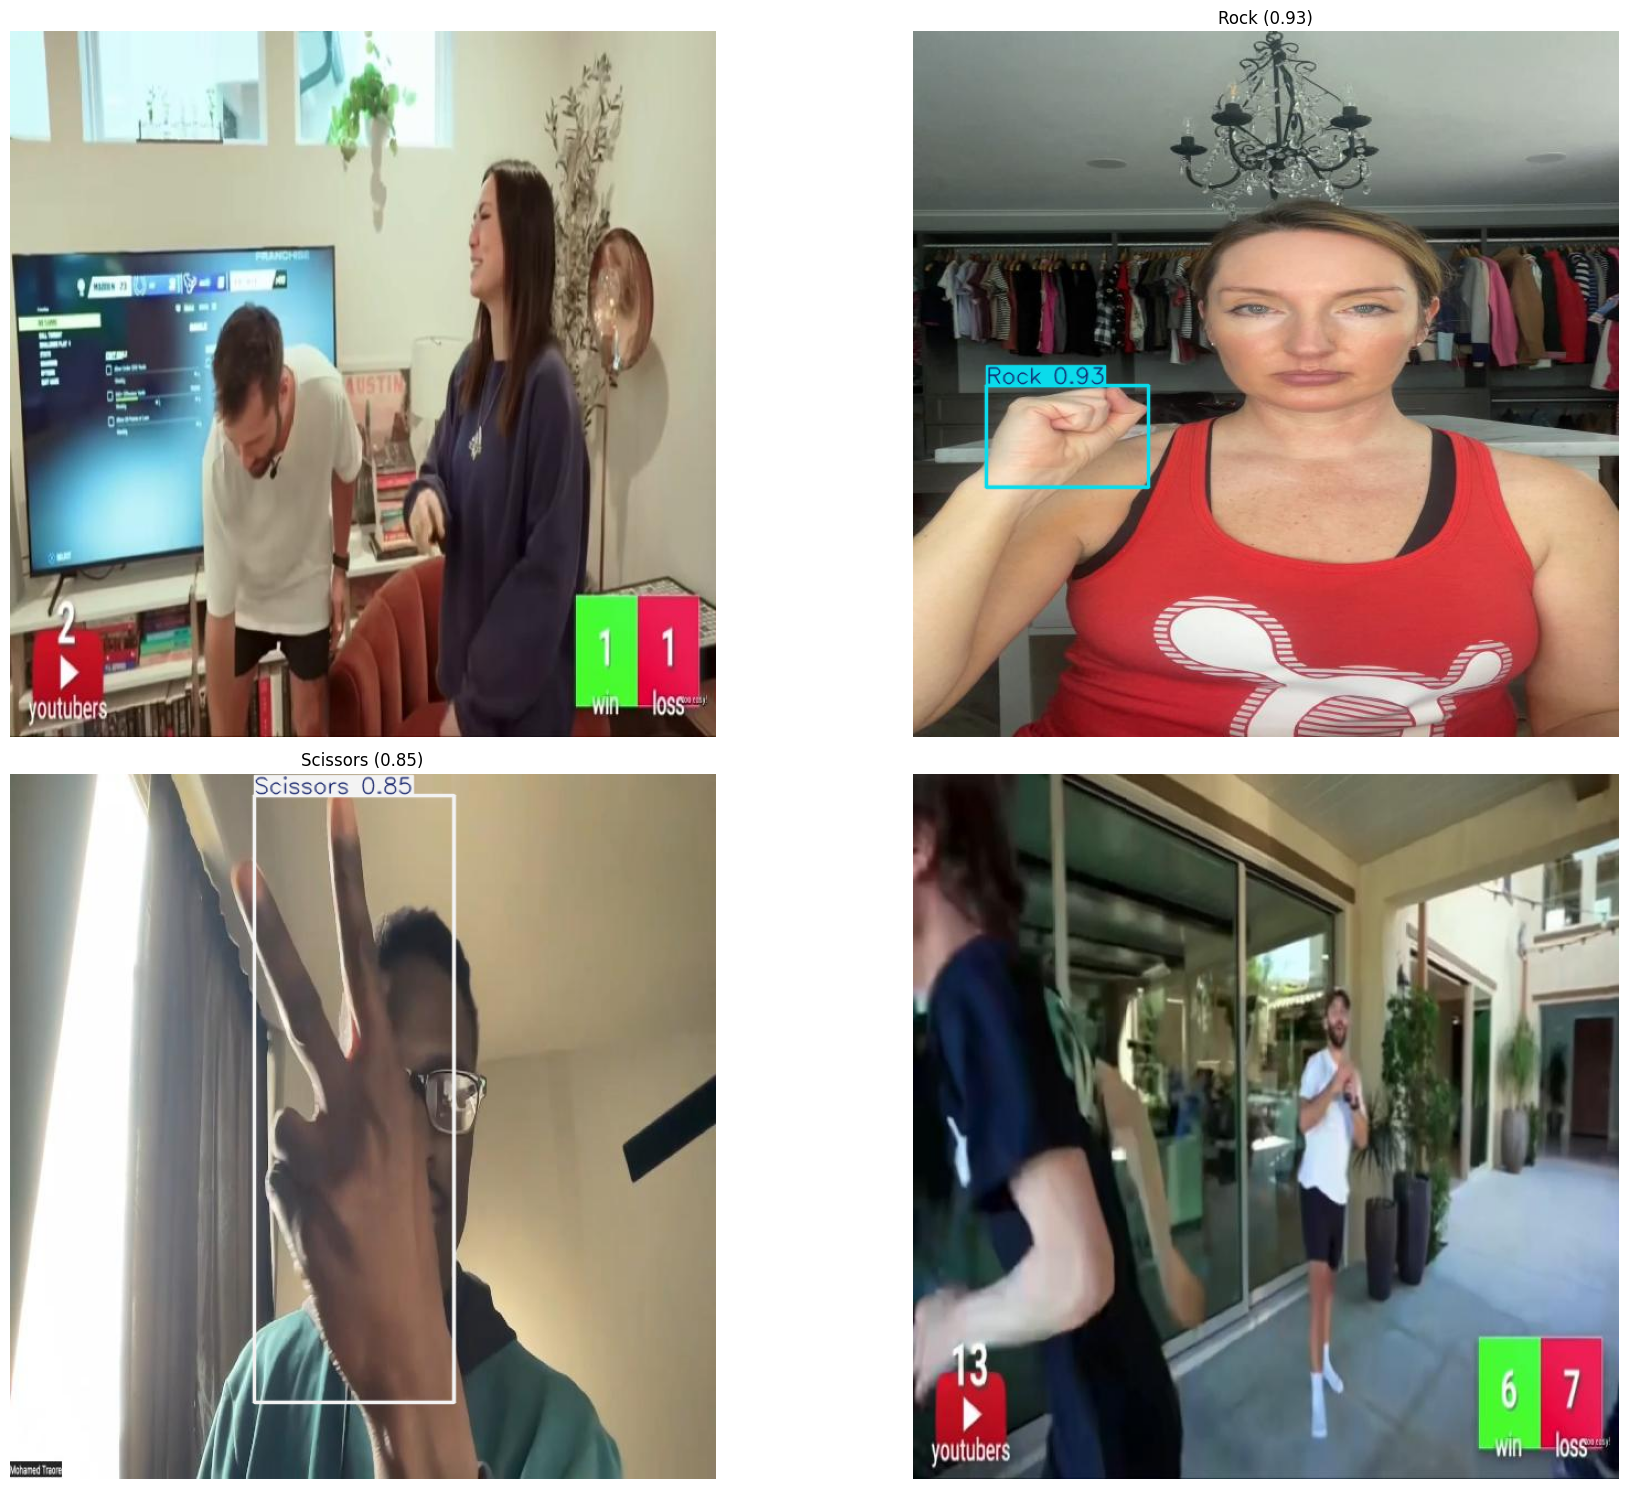

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO('C:/cv-project/runs/detect/rps_yolov8n_first_run11/weights/best.pt')

# Get and shuffle test images
test_dir = 'C:/cv-project/rock-paper-scissors-14/test/images'
images = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.jpg')]
random.shuffle(images)

# Create figure
plt.figure(figsize=(20, 15))

# Process 4 images
for idx, img_path in enumerate(images[:4], 1):
    # Run prediction
    results = model(img_path, conf=0.5)

    # Get annotated image
    annotated_img = results[0].plot()[..., ::-1]  # BGR to RGB

    # Add subplot
    plt.subplot(2, 2, idx)
    plt.imshow(annotated_img)

    # Add title with detected classes
    detections = results[0].boxes
    if len(detections) > 0:
        class_ids = detections.cls.tolist()
        conf_scores = detections.conf.tolist()
        class_names = [results[0].names[int(c)] for c in class_ids]
        title = ", ".join([f"{n} ({c:.2f})" for n, c in zip(class_names, conf_scores)])
        plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()